In [20]:
'''
1. Task (Web Scraping):
Reddit Wallstreet-Bets Data set Scraping task:'''
#First we familiarize ourselves with the reddit website will see the html structure of the daily discussion page of WSB
import requests
url="https://www.reddit.com/r/wallstreetbets/search/?q=flair%3A%22Daily%20Discussion%22&restrict_sr=1&sort=new%27"
html=requests.get(url)
print(html.text)


    <!DOCTYPE html>
    <html lang="en-US" class="theme-beta theme-light">
      <head>
        <script>
    var __SUPPORTS_TIMING_API = typeof performance === 'object' && !!performance.mark && !! performance.measure && !!performance.getEntriesByType;
    function __perfMark(name) { __SUPPORTS_TIMING_API && performance.mark(name); };
    var __firstPostLoaded = false;
    function __markFirstPostVisible() {
      if (__firstPostLoaded) { return; }
      __firstPostLoaded = true;
      __perfMark("first_post_title_image_loaded");
    }
    var __firstCommentLoaded = false;
    function __markFirstCommentVisible() {
      if (__firstCommentLoaded) { return; }
      __firstCommentLoaded = true;
      __perfMark("first_comment_loaded");
    }
  </script>
        <script>__perfMark('head_tag_start');</script>
        <meta charSet="utf-8"/>
        <meta name="viewport" content="width=device-width, initial-scale=1" />
        <meta name="referrer" content="origin-when-cross-origin" />
    

In [21]:
#Now we will use selenium for web scraping with chrome as browser 
from selenium import webdriver
driver=webdriver.Chrome(executable_path=r"c:\chromedriver.exe")
driver.get(url)

C:\Users\aiman\AppData\Local\Temp\ipykernel_41016\4179913636.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(executable_path=r"c:\chromedriver.exe")


In [3]:
#To install selenium for web scraping
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
#Now we look for a tag of the recent date thread so that we can use the thread link to find relevent comments
from datetime import date,timedelta
from dateutil.parser import parse

yesterday=date.today()-timedelta(days=3)
links=driver.find_elements('xpath','//*[@class="_eYtD2XCVieq6emjKBH3m"]')
link_ids=[]                                
for a in links:
    if a.text.startswith('Daily Discussion Thread'):
        date="".join(a.text.split(' ')[-3:])
        parsed=parse(date)
        print(parsed)
        link=a.find_element('xpath',('../..')).get_attribute('href')
        link_ids.append(link)
        print(link)
        '''
        if parse(str(yesterday))==parsed:
            link=a.find_element('xpath',('../..')).get_attribute('href')
        '''    
    if a.text.startswith('Weekend'):
        weekend_date=a.text.split(' ')
        parsed_date=weekend_date[-3]+' '+weekend_date[-2].split('-')[1]+' '+weekend_date[-1]
        parsed=parse(parsed_date)
        link=a.find_element_by_xpath('../..').get_attribute('href')
        link_ids.append(link)
        print(link)
        saturday=weekend_date[-3]+' '+str(int(weekend_date[-2].split('-')[1])-1)+' '+weekend_date[-1]
        link=a.find_element_by_xpath('../..').get_attribute('href')
        link_ids.append(link)
        print(link)
        '''
         if parse(str(yesterday))==parsed:
            link=a.find_element_by_xpath('../..').get_attribute('href')
        elif parse(str(yesterday))==parse(str(saturday)):
            link=a.find_element_by_xpath('../..').get_attribute('href')
        '''
       
        

2023-03-02 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/11fzzpw/daily_discussion_thread_for_march_02_2023/
2023-03-03 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/11gxva3/daily_discussion_thread_for_march_03_2023/
2023-03-01 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/11f0w3s/daily_discussion_thread_for_march_01_2023/
2023-02-24 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/11aorm2/daily_discussion_thread_for_february_24_2023/
2023-02-28 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/11e3ac2/daily_discussion_thread_for_february_28_2023/
2023-02-27 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/11d95qb/daily_discussion_thread_for_february_27_2023/
2023-02-23 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/119uzsr/daily_discussion_thread_for_february_23_2023/
2023-02-14 00:00:00
https://www.reddit.com/r/wallstreetbets/comments/1122o82/daily_discussion_thread_for_february_14_2023/
2023-02-22 00:00:00
https

In [27]:
#Only the third part of this link gives me the thread ID
thread_links=[]
for link_id in link_ids:
    stock_link=link_id.split("/")[-3]
    thread_links.append(stock_link)
print(thread_links)

['11fzzpw', '11gxva3', '11f0w3s', '11aorm2', '11e3ac2', '11d95qb', '119uzsr', '1122o82', '118vbld', '113nzvx', '1180thi', '114hmbu', '112vfwc', '10vz3jm', '10rn7jr', '10qqkin', '10shnj0']


In [22]:
#Ignore this part of the code since the pushshift API isn't working as expected
html=requests.get(f"https://api.pushshift.io/reddit/submission/comment_ids/{stock_link}")
raw_comments_list=html.json()
#driver.close()
print(raw_comments_list)


{'detail': 'Not Found'}


In [ ]:
#Instead we will use praw API to query reddit's WSB daily thread page of February 24th comments. 
pip install praw

In [31]:
#We shall create a list of these comments
import praw
reddit = praw.Reddit(client_id='kOmNx5qcbzJzvBUrssbg1g', client_secret='fvQmHK2v-7y9MTYSu7NP-tCRu77JLA', user_agent='Scraping App')
for thread_link in thread_links:
    submission = reddit.submission(id=thread_link)
    submission.comments.replace_more(limit=None)
    body=[]
    score_hidden=[]
    archived=[]
    name=[]
    author=[]
    downs=[]
    created_utc=[]
    subreddit_id=[]
    link_id=[]
    parent_id=[]
    score=[]
    retrieved_on=[]
    controversiality=[]
    gilded=[]
    id=[]
    subreddit=[]
    ups=[]
    for comment in submission.comments:
        body.append(comment.body)
        score_hidden.append(comment.score_hidden)
        archived.append(comment.archived)
        name.append(comment.name)
        author.append(comment.author)
        downs.append(comment.downs)
        created_utc.append(comment.created_utc)
        subreddit_id.append(comment.subreddit_id)
        link_id.append(comment.link_id)
        parent_id.append(comment.parent_id)
        score.append(comment.score)
        controversiality.append(comment.controversiality)
        gilded.append(comment.gilded)
        id.append(comment.id)
        subreddit.append(comment.subreddit)
        ups.append(comment.ups)

KeyboardInterrupt: 

In [34]:
df_full={}
df_full["body"]=body
df_full["score_hidden"]=score_hidden
df_full["archived"]=archived
df_full["name"]=name
df_full["author"]=author
df_full["downs"]=downs
df_full["created_utc"]=created_utc
df_full["subreddit_id"]=subreddit_id
df_full["link_id"]=link_id
df_full["parent_id"]=parent_id
df_full["score"]=score
df_full["controversiality"]=controversiality
df_full["gilded"]=gilded
df_full["id"]=id
df_full["subreddit"]=subreddit
df_full["ups"]=ups

In [35]:
import pandas as pd 
df=pd.DataFrame(df_full)
print(df.head())

                                                body  score_hidden  archived  \
0  My mortgage is locked in at 2.75%, so for me, ...         False     False   
1  Market goes up: I am a bull, I have always bee...         False     False   
2  Buy puts at open and see immediate recovery in...         False     False   
3   2 Fed officials speaking in 1 hour \n\nSPY 0 eod         False     False   
4  jokes on me because i sold my all my spy 400 a...         False     False   

         name               author  downs   created_utc subreddit_id  \
0  t1_j8w6p56        2-Sigma-Penis      0  1.676634e+09     t5_2th52   
1  t1_j8w5nac        brook___trout      0  1.676633e+09     t5_2th52   
2  t1_j8wdkm5  I_Bought_At_The_Top      0  1.676638e+09     t5_2th52   
3  t1_j8wa9bh         mrbiscuits24      0  1.676636e+09     t5_2th52   
4  t1_j8wfuow   Ill-Expression1737      0  1.676639e+09     t5_2th52   

      link_id   parent_id  score  controversiality  gilded       id  \
0  t3_114hmbu  

In [25]:
#Now I create a dataframe of this so that I can create a csv file if needed
#import pandas as pd
#df=pd.DataFrame(comments)

In [26]:
#df.head()

,0
0,US Personal Income +0.6% In Jan; Consensus +1....
1,"# Friday, February 24, 2023\n\n8:30 am - Consu..."
2,Earnings call; we lost a ton money again and o...
3,"Welp, the guy who had $77k in Tesla calls expi..."
4,I saw an article that says NVDA is now in buyi...


In [27]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1424 non-null   object
dtypes: object(1)
memory usage: 11.2+ KB


In [ ]:
{"body","score_hidden","archived","name","author","downs","created_utc","subreddit_id","link_id","parent_id","score","retrieved_on","controversiality","gilded","id","subreddit","ups"}

In [36]:
print(len(body))

5849


In [40]:
pip install ijson

     ---------------------------------------- 48.2/48.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Successfully installed ijson-3.2.0.post0




[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import ijson
f=open(r"C:\Users\aiman\Downloads\wsbData.json")
objects=ijson.items(f,'')

#data=json.load(f,errors="ignore")
#for i in data:
#    print(i)

In [28]:
'''
2. Task (EDA):
Perform Exploratory Data Analysis on Stock Datasets (Combine all stocks in one CSV file).
'''
#We do this step to check the business and statistical soundness of of ourr model
stocks=pd.read_csv(r"C:\Users\aiman\Downloads\S&P500 Stocks\S&P500 Stocks\all_stocks_5yr.csv")
stocks

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [36]:
stocks.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [43]:
#We will drop the values that aren't available
stocks2=stocks.dropna()

In [44]:
stocks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


<AxesSubplot:>

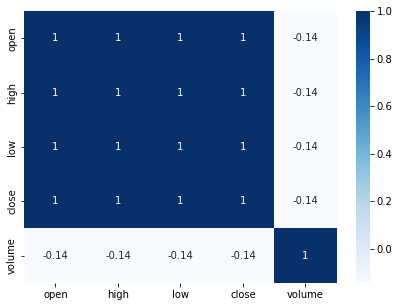

In [46]:
#Now to find the correlation between the different columns
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(stocks2.corr(),cmap='Blues',annot=True)

In [48]:
#A more useful correlation matrix would be like so
stocks2['open-high'] = stocks2['open']-stocks2['high']
stocks2['open-low'] = stocks2['open'] - stocks2['low']
stocks2['close-high'] = stocks2['close']-stocks2['high']
stocks2['close-low'] = stocks2['close'] - stocks2['low']
stocks2['high-low'] = stocks2['high'] -stocks2['low']
stocks2['open-close'] = stocks2['open'] -stocks2['close']
stocks2.head()

C:\Users\aiman\AppData\Local\Temp\ipykernel_8436\768440411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks2['open-high'] = stocks2['open']-stocks2['high']
C:\Users\aiman\AppData\Local\Temp\ipykernel_8436\768440411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks2['open-low'] = stocks2['open'] - stocks2['low']
C:\Users\aiman\AppData\Local\Temp\ipykernel_8436\768440411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,date,open,high,low,close,volume,Name,open-high,open-low,close-high,close-low,high-low,open-close
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.05,0.44,-0.37,0.12,0.49,0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.12,0.63,-0.55,0.20,0.75,0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.06,0.35,-0.24,0.17,0.41,0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,-0.64,0.05,-0.28,0.41,0.69,-0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.02,1.78,-0.97,0.83,1.80,0.95


<AxesSubplot:>

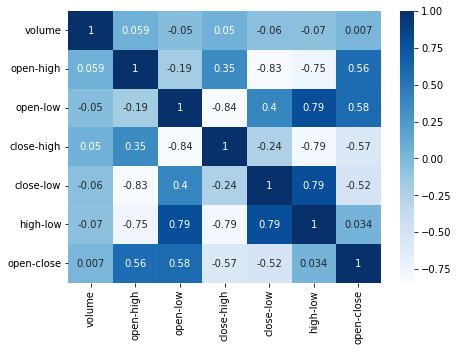

In [50]:
#We will drop open,high,low,close since it isn't as useful as previously seen
stocks3=stocks2.copy()
stocks3=stocks3.drop(['open','high','low','close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(stocks3.corr(),cmap='Blues',annot=True)

In [7]:
print(len(MyList))

297914


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             499 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [11]:
'''
3. Task (Text Analysis):
Perform Text Preprocessing on Wallstreetbets Post Data.
'''
import nltk
import string
import re

In [8]:
#Convert all the letters to lower case
smaller_case=[]
for comment in df['body']:
    smaller_case.append(comment.lower())

In [9]:
len(smaller_case)

2979131

In [12]:
#remove numbers
remove_numbers=[]
for smaller_case_comment in smaller_case:
    result = re.sub(r'\d+', '', smaller_case_comment)
    remove_numbers.append(result)

In [13]:
#Remove punctuation marks so that been, been! are not treated separately
remove_punctuation=[]
for numbers_removed in remove_numbers:
    translator = str.maketrans('', '', string.punctuation)
    result=numbers_removed.translate(translator)
    remove_punctuation.append(result)

In [14]:
#Now we remove white spaces
remove_whitespace=[]
for punctuation_removed in remove_punctuation:
    result=" ".join(punctuation_removed.split())
    remove_whitespace.append(result)

In [83]:
remove_whitespace

['us personal income in jan consensus us personal spending in jan consensus so lemme get this straight yall are making less money than expected but spending more this is the american way',
 'friday february am consumer spending am personal income am pce index am core pce index am core pce yearoveryear am new home sales am consumer sentiment final am fed gov philip jefferson speaks am cleveland feds loretta mester speaks am st louis feds james bullard speaks pm boston feds susan collins speaks pm fed gov christopher waller speaks',
 'earnings call we lost a ton money again and our product is shit pre market bynd 🤡',
 'welp the guy who had k in tesla calls expiring today and refused to sell has now lost everything',
 'i saw an article that says nvda is now in buying range band imgemotetth imgemotetthimgemotetth',
 'deleted',
 'i knew disinflation was a made up word mfers tryna gaslight me oh look a stop sign lemme disaccelerate my car and come to a stop then ill disengage my breaks and d

In [15]:
#Now we are going to remove stopwords ie words that don't add any extra menaing to the sentence
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords_removed=[]
for text in remove_whitespace:
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    filtered_text=[word for word in word_tokens if word not in stop_words]
    stopwords_removed.append(filtered_text)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [100]:
print(set(stopwords.words("english")))

{'down', 'couldn', 'were', 'as', 're', 'mightn', 'its', "should've", 't', 'or', 'these', 'own', 'when', 'that', 'myself', 'shan', 'a', "she's", 'by', 'too', "don't", 'their', 'once', 'was', 'same', 'needn', 'wouldn', 'so', 'the', 'off', 'ours', 'now', 'ma', 'out', 'o', 'them', "haven't", "mustn't", 'then', 'ain', 'him', 'just', 'are', 'had', 'to', "aren't", "mightn't", 'won', 've', 'am', 'd', 'll', 'until', 'during', 'few', 'don', 'through', 'aren', 'wasn', 'before', 'what', "it's", 'those', 'against', "didn't", 'she', 'between', 'mustn', 'more', 'here', 's', 'shouldn', 'there', 'hadn', "shouldn't", 'your', 'does', 'you', 'being', "wouldn't", "doesn't", "won't", 'under', 'how', 'didn', "you'll", 'each', 'm', 'from', 'after', 'having', 'they', 'be', 'haven', 'our', 'hers', 'itself', 'can', 'which', 'been', 'because', 'about', 'only', 'her', 'should', 'while', 'y', 'this', 'at', 'will', 'of', 'with', 'over', "wasn't", 'nor', 'he', 'is', 'if', "hadn't", "you're", 'such', 'his', 'why', 'is

In [105]:
print(stopwords_removed)

[['us', 'personal', 'income', 'jan', 'consensus', 'us', 'personal', 'spending', 'jan', 'consensus', 'lem', 'get', 'straight', 'yall', 'making', 'less', 'money', 'expected', 'spending', 'american', 'way'], ['friday', 'february', 'consumer', 'spending', 'personal', 'income', 'pce', 'index', 'core', 'pce', 'index', 'core', 'pce', 'yearoveryear', 'new', 'home', 'sales', 'consumer', 'sentiment', 'final', 'fed', 'gov', 'philip', 'jefferson', 'speaks', 'cleveland', 'feds', 'loretta', 'mester', 'speaks', 'st', 'louis', 'feds', 'james', 'bullard', 'speaks', 'pm', 'boston', 'feds', 'susan', 'collins', 'speaks', 'pm', 'fed', 'gov', 'christopher', 'waller', 'speaks'], ['earnings', 'call', 'lost', 'ton', 'money', 'product', 'shit', 'pre', 'market', 'bynd', '🤡'], ['welp', 'guy', 'k', 'tesla', 'calls', 'expiring', 'today', 'refused', 'sell', 'lost', 'everything'], ['saw', 'article', 'says', 'nvda', 'buying', 'range', 'band', 'imgemotetth', 'imgemotetthimgemotetth'], ['deleted'], ['knew', 'disinflatio

In [16]:
#Now we will use lemmatizing ie coverting a word to it's root form eg book becomes books and ensuring the word belongs to english
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
processed_comment_word=[]
processed_comment=[]
for comment in stopwords_removed:
    for comment_word in comment:
        word_token=word_tokenize(comment_word)
        lemmas=[lemmatizer.lemmatize(word,pos='v')for word in word_token]
        processed_comment_word.append(lemmas)
    processed_comment.append(processed_comment_word)